In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
raw = 'raw'

In [3]:
import pandas as pd

# Calendar

In [4]:
df_calendar = pd.read_csv(f'{raw}/calendar.csv')
df_calendar.head(1)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0


In [5]:
df_calendar.describe()

,wm_yr_wk,wday,month,year,snap_CA,snap_TX,snap_WI
count,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000
mean,11347.086338,3.997461,6.325546,2013.288471,0.330117,0.330117,0.330117
std,155.277043,2.001141,3.416864,1.580198,0.470374,0.470374,0.470374
min,11101.000000,1.000000,1.000000,2011.000000,0.000000,0.000000,0.000000
25%,11219.000000,2.000000,3.000000,2012.000000,0.000000,0.000000,0.000000
50%,11337.000000,4.000000,6.000000,2013.000000,0.000000,0.000000,0.000000
75%,11502.000000,6.000000,9.000000,2015.000000,1.000000,1.000000,1.000000
max,11621.000000,7.000000,12.000000,2016.000000,1.000000,1.000000,1.000000


In [6]:
df_calendar['d'].value_counts().min()

1

In [7]:
df_calendar['d'].str.split('_').str[1].astype(int).max()

1969

In [8]:
# No gaps
(pd.to_datetime(df_calendar['date'])-pd.to_datetime(df_calendar['date']).shift(1)).value_counts()

1 days    1968
Name: date, dtype: int64

In [10]:
df_calendar.head(1)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0


In [11]:
df_calendar['event_type_1'].value_counts()

Religious    55
National     52
Cultural     37
Sporting     18
Name: event_type_1, dtype: int64

In [12]:
df_calendar['event_type_2'].value_counts()

Cultural     4
Religious    1
Name: event_type_2, dtype: int64

In [19]:
pd.concat([df_calendar['event_name_1'], df_calendar['event_name_2']]).value_counts()

NBAFinalsEnd           6
StPatricksDay          6
LentStart              6
Easter                 6
Mother's day           6
Cinco De Mayo          6
Ramadan starts         6
Purim End              6
OrthodoxEaster         6
ValentinesDay          6
MemorialDay            6
SuperBowl              6
PresidentsDay          6
Pesach End             6
Father's day           6
LentWeek2              6
NBAFinalsStart         6
OrthodoxChristmas      5
VeteransDay            5
IndependenceDay        5
Chanukah End           5
ColumbusDay            5
Thanksgiving           5
Halloween              5
Christmas              5
LaborDay               5
Eid al-Fitr            5
NewYear                5
MartinLutherKingDay    5
EidAlAdha              5
dtype: int64

# Prices

In [21]:
df_prices = pd.read_csv(f'{raw}/sell_prices.csv')
df_prices.head(1)

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58


In [22]:
df_prices['item_id'].value_counts()

HOUSEHOLD_1_313    2820
HOUSEHOLD_1_177    2820
HOUSEHOLD_1_109    2820
FOODS_3_586        2820
FOODS_3_432        2820
FOODS_3_406        2820
HOUSEHOLD_1_046    2820
HOUSEHOLD_1_097    2820
FOODS_3_504        2820
FOODS_2_294        2820
HOBBIES_1_372      2820
FOODS_1_041        2820
HOBBIES_1_343      2820
HOUSEHOLD_2_184    2820
HOBBIES_1_010      2820
HOUSEHOLD_1_316    2820
HOBBIES_1_213      2820
HOBBIES_1_194      2820
HOUSEHOLD_1_460    2820
FOODS_3_020        2820
FOODS_3_090        2820
HOBBIES_1_355      2820
FOODS_3_212        2820
FOODS_3_704        2820
HOUSEHOLD_2_212    2820
HOUSEHOLD_2_410    2820
HOBBIES_1_164      2820
FOODS_3_526        2820
FOODS_3_295        2820
HOUSEHOLD_2_379    2820
                   ... 
FOODS_3_038         739
HOBBIES_1_125       737
FOODS_3_647         737
FOODS_3_119         735
HOUSEHOLD_1_274     734
FOODS_3_472         734
HOUSEHOLD_1_201     731
FOODS_2_185         731
HOBBIES_2_026       730
HOBBIES_1_269       729
HOUSEHOLD_1_208 

In [23]:
# 10 stores is drop in the bucket vs 329 stores in TX, 167 in CA, 77 in WI as of 2007
df_prices['store_id'].value_counts()

TX_2    701214
TX_1    699796
CA_1    698412
WI_3    696094
CA_3    693990
TX_3    691112
CA_4    679025
WI_2    678171
WI_1    665912
CA_2    637395
Name: store_id, dtype: int64

In [27]:
df_prices['item_id'].str.split('_').str[0].value_counts()

FOODS        3181789
HOUSEHOLD    2375427
HOBBIES      1283905
Name: item_id, dtype: int64

In [30]:
df_prices['item_id'].str.split('_').str[0:2].value_counts()

[FOODS, 3]        1835270
[HOUSEHOLD, 2]    1215130
[HOUSEHOLD, 1]    1160297
[HOBBIES, 1]       960337
[FOODS, 2]         823305
[FOODS, 1]         523214
[HOBBIES, 2]       323568
Name: item_id, dtype: int64

In [34]:
len(df_prices)

6841121

In [35]:
df_prices.head(1)

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58


In [ ]:
# TODO:
# does everything has a price every week & every store?

In [52]:
priced_weeks = df_prices\
    .pivot_table(index=['item_id', 'store_id'], aggfunc='count')\
    .reset_index()
priced_weeks.columns = ['item_id', 'store_id', 'count', 'dropme']
priced_weeks.drop('dropme', axis=1, inplace=True)
priced_weeks.head(1)

,item_id,store_id,count
0,FOODS_1_001,CA_1,282


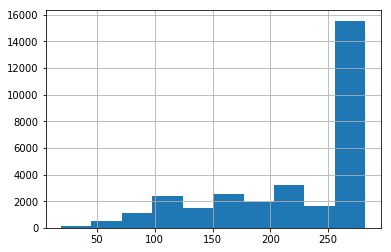

In [54]:
priced_weeks['count'].hist()

In [59]:
# 2/3 of goods are not priced every week & every store
len(priced_weeks.query('count != 282')) / float(len(priced_weeks))

0.6414562151525091

In [62]:
priced_weeks['count'].describe()

count    30490.000000
mean       224.372614
std         68.000808
min         19.000000
25%        173.000000
50%        260.000000
75%        282.000000
max        282.000000
Name: count, dtype: float64

In [63]:
priced_weeks['count'].value_counts()

282    10932
281     1043
280      544
277      301
279      280
276      267
192      252
217      242
278      234
216      223
225      212
275      203
224      196
230      194
273      192
228      188
271      186
272      184
121      182
174      176
175      166
122      161
208      161
229      153
227      153
120      152
207      149
274      149
226      143
191      142
       ...  
60         9
63         8
44         8
19         8
26         8
54         7
48         7
62         7
50         7
51         7
42         6
36         6
49         5
41         5
40         4
58         4
21         3
29         3
69         3
37         3
23         2
45         2
34         2
22         2
53         2
24         1
46         1
30         1
52         1
32         1
Name: count, Length: 259, dtype: int64

In [65]:
priced_weeks[priced_weeks['count'] == 19]

,item_id,store_id,count
12070,FOODS_3_595,CA_1,19
12072,FOODS_3_595,CA_3,19
20218,HOUSEHOLD_1_020,WI_2,19
22732,HOUSEHOLD_1_278,CA_3,19
23061,HOUSEHOLD_1_311,CA_2,19
23807,HOUSEHOLD_1_386,WI_1,19
23923,HOUSEHOLD_1_400,CA_4,19
23971,HOUSEHOLD_1_405,CA_2,19


In [69]:
# looks like an example of something being sold elsewhere and then rolled out to other locations
df_prices.query('item_id == "FOODS_3_595"')['store_id'].value_counts()

TX_3    150
WI_2    149
TX_2    147
CA_4    146
TX_1    144
WI_1    144
WI_3    142
CA_2     89
CA_3     19
CA_1     19
Name: store_id, dtype: int64

In [87]:
df_prices.query('item_id == "FOODS_3_595"')\
    .groupby('store_id')\
    .aggregate({'wm_yr_wk': ['min', 'max']})\
    .reset_index()

store_id wm_yr_wk       
                min    max
0     CA_1    11603  11621
1     CA_2    11437  11621
2     CA_3    11603  11621
3     CA_4    11333  11621
4     TX_1    11335  11621
5     TX_2    11332  11621
6     TX_3    11329  11621
7     WI_1    11335  11621
8     WI_2    11330  11621
9     WI_3    11337  11621

In [101]:
# there seem to be no products in the dataset which got rolled back
df_prices.groupby(['store_id', 'item_id'])\
    .aggregate({'wm_yr_wk': 'max'}).reset_index()\
    .query('wm_yr_wk < 11621')

,store_id,item_id,wm_yr_wk


In [ ]:
# TODO: are there any gaps in these price series? what's the business meaning of that? do they log just change events?
# TODO: how far are the prices we're provided with for the moments we're asked to estimate the sales for?
# TODO: how do these shops compare in terms of available positions? earliest dates? velocity of date changes?
# TODO: can there be price differences between the shops for the same week & position?

In [32]:
df_sales_train = pd.read_csv(f"{raw}/sales_train_validation.csv")
df_sales_train.head(1)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1


In [33]:
len(df_sales_train)

30490

In [ ]:
df_sales_train.merge(df_prices, on=['item_id', 'store_id', 'wm_yr_wk'])